# Analysing Exit Surveys From Employees

In this project, we will be working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) insitiute in Queensland, Australia. 

We want to analyse the data and provide answers to help stakeholders know the answers to some of the following questions:

 - Are employees who only worked for the insititutes for a short period of time resigning due to some kind of dissatisfaction? 

 - Are younger employees more likely to resign and why?

We will need to combine both data sets to answer these questions.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dete_survey=pd.read_csv("dete_survey.csv")
dete_survey.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [26]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [27]:
tafe_survey=pd.read_csv("tafe_survey.csv")
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [28]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


By printing information about the dete_survey dataframe and tafe_survey dataframe, we can see that the dete_survey contains "Not Stated" values indicating that the value is missing. We will have to change this to "NaN". Both dataframes contains columns that are the same but with different names and some columns are not needed for this analysis and hence should be removed.

# Identifying and dropping missing columns

As mentioned above, we wil first correct the "Not Stated" values.


In [29]:
dete_survey=dete_survey.replace("Not Stated","NaN")
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [30]:
# Remove columns we don't need for our analysis
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

#Check that the columns were dropped
print(dete_survey.columns)
print(tafe_survey.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

In [31]:
# Clean the column names
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(' ', '_')

#We will use mapping technique to rename columns in tafe_survey
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey=tafe_survey.rename(mapping,axis=1)
tafe_survey.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

# Filtering the Data

We only need people who have resigned, so we will filter through the separation type column.


In [32]:
#check unique values for the separationtype column
print(dete_survey["separationtype"].value_counts())
print("\n")
print(tafe_survey["separationtype"].value_counts())

#select respondents who have resignation separation type
tafe_resignations=tafe_survey[tafe_survey["separationtype"]=="Resignation"].copy()
tafe_resignations.head()



Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [33]:
#update all words containting "resignation" to "Resignation"
dete_survey["separationtype"]=dete_survey["separationtype"].str.split("-").str[0]
dete_resignations=dete_survey[dete_survey["separationtype"]=="Resignation"].copy()
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997,2008,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


# Verifying the Data

We cannot assume the data we are analysing isn't corrupted in some way. It may not be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we will create a meaningful project without bad data.

In [34]:
#Check the unique values
dete_resignations.dropna(subset=["cease_date","dete_start_date"])
print(dete_resignations["cease_date"].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64


In [35]:

#split the dates and pick the year
dete_resignations["cease_date"]=dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")
print(dete_resignations["cease_date"].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [36]:
print(tafe_resignations["cease_date"].value_counts())

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


In [37]:
print(dete_resignations["dete_start_date"].value_counts().sort_values())

1971     1
1963     1
1975     1
1982     1
1984     1
1977     1
1987     1
1973     1
1972     1
1983     2
1974     2
1976     2
1986     3
2001     3
1985     3
1991     4
1989     4
1995     4
1988     4
1993     5
1980     5
1990     5
1997     5
1998     6
2002     6
1994     6
2003     6
1996     6
1992     6
1999     8
2000     9
2013    10
2006    13
2009    13
2004    14
2005    15
2010    17
2007    21
2012    21
2008    22
2011    24
NaN     28
Name: dete_start_date, dtype: int64


Checking the unique values we have found the following,
 - The years in both dataframes do not align
 - There are a lot more resignations in dete_survey in 2013 compared to tafe_survey
 
Since we are not interested in analysing the results by year, no further changes need to be made.

# Adding a New Column

Let's refer back to the aim of this project. 

 - Are employees who only worked for the insititutes for a short period of time resigning due to some kind of dissatisfaction? 

 - Are younger employees more likely to resign and why?
 
We dont have the timeframe column in dete_survey, we will have to calculate and add a column to this dataframe. We will call this column, "institute_service", the same name as in tafe_survey.

In [38]:
#remove NaN
dete_resignations["dete_start_date"]=dete_resignations["dete_start_date"].astype("float")

#add column
dete_resignations["institute_service"]=dete_resignations["cease_date"]-dete_resignations["dete_start_date"]
#check values
dete_resignations["institute_service"].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Finding Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. tafe_survey_updated:
 - Contributing Factors. Dissatisfaction
 - Contributing Factors. Job Dissatisfaction
2. dafe_survey_updated:
 - job_dissatisfaction
 - dissatisfaction_with_the_department
 - physical_work_environment
 - lack_of_recognition
 - lack_of_job_security
 - work_location
 - employment_conditions
 - work_life_balance
 - workload
 
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

True: indicates a person resigned because they were dissatisfied in some way
False: indicates a person resigned because of a reason other than dissatisfaction with the job
NaN: indicates the value is missing



In [39]:
# Function for updating the values in the contributing factors columns to be either True, False, or NaN
def update_values(val):
    if pd.isnull(val):
        return np.nan
    elif val=="-":
        return False
    else:
        return True
    
#New "dissatisfied column"
tafe_resignations["dissatisfied"]=tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_values).any(axis=1,skipna=False)
#Avoid SettingWithCopy Warning
tafe_resignations=tafe_resignations.copy()

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations = dete_resignations.copy()



# Combining the Dataframes

First let's add a column to each dataframe that will allow us to easily distinguish between the two. We will name this column, "institute".

In [40]:
# Add new columns
tafe_resignations["institute"]="TAFE"
dete_resignations["institute"]="DETE"

# Combine the dataframes
combined=pd.concat([dete_resignations,tafe_resignations], ignore_index=True)

# Check null values
combined.isnull().sum().sort_values()



separationtype                                           0
institute                                                0
id                                                       0
dissatisfied                                             8
cease_date                                              16
position                                                53
employment_status                                       54
age                                                     55
gender                                                  59
institute_service                                       88
WorkArea                                               311
Institute                                              311
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Study                            319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Ill Health                       319
Contributing Factors. Interpersonal Conflict           3

In [41]:
# Drop columns with more than 300 null values
combined=combined.dropna(thresh=300, axis=1).copy()


# Cleaning the industry_service Column

Next, we'll clean the institute_service column and categorise employees according to the following definitions:

New: Less than 3 years in the workplace

Experienced: 3-6 years in the workplace

Established: 7-10 years in the workplace

Veteran: 11 or more years in the workplace

The institute_service column contains values in a couple different forms:

In [42]:
combined["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


We need to convert the values in the institute_service column into float type. 

In [43]:
combined["institute_service"]=combined["institute_service"].astype("str").str.extract(r"(\d+)")
combined["institute_service"]=combined["institute_service"].astype("float")
combined["institute_service"].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [44]:
# Create function to transform years of service to categories
def change_service(val):
    if val<3:
        return "New"
    elif val<=6:
        return "Experienced"
    elif val<=10:
        return "Established"
    else:
        return "Veteran"

# Apply transformation
combined["categorised_service"]=combined["institute_service"].apply(change_service)
# Check if working
combined["categorised_service"].value_counts()

Veteran        224
New            193
Experienced    172
Established     62
Name: categorised_service, dtype: int64

We can see that many of the employees are new and many go on to stay for a long time at the company.



# Initial Analysis


False    411
True     240
Name: dissatisfied, dtype: int64


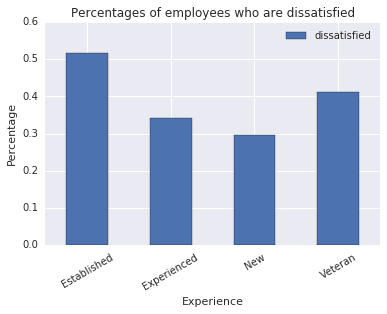

In [52]:
print(combined["dissatisfied"].value_counts())

# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined.pivot_table(index='categorised_service', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)
plt.ylabel("Percentage")
plt.xlabel("Experience")
plt.title("Percentages of employees who are dissatisfied")
plt.show()

This plot shows that the employees who have worked 7-10 years are most dissatisfied, along with veterans who have served 11+ years, second most dissatisfied. In fact, the longer the employees have spent at the company, the more likely they are to be dissatisfied.
